# Lecture 4 exercise 1 cable #

In [1]:
%reset -f
import sympy as sp

In [2]:
L = sp.S(6)
a = sp.S(2)
b = sp.S(2)
c = L - a - b
q1 = sp.S(5)
q2 = sp.S(0)
q3 = sp.S(0)
F = sp.S(15)

In [3]:
Bv = (q1*a*a/2+F*(a+b))/(a+b+c)
display(Bv)
H = Bv*c*5/4
display(H)
display(H.evalf())

35/3

175/6

29.1666666666667

In [4]:
H= sp.symbols('H',real=True,positive=True)
x = sp.symbols('x',real=True)
C1, C2, C3, C4, C5, C6 = sp.symbols('C1 C2 C3 C4 C5 C6')
z1, z2, z3 = sp.symbols('z1 z2 z3',cls=sp.Function)
ODE1 = sp.Eq(H * sp.diff(z1(x),x,2) , -q1)
ODE2 = sp.Eq(H * sp.diff(z2(x),x,2) , -q2)
ODE3 = sp.Eq(H * sp.diff(z3(x),x,2) , -q3)
sol = sp.dsolve([ODE1,ODE2,ODE3],[z1(x),z2(x),z3(x)])
z1 = sol[0].rhs
z2 = sol[1].rhs
z3 = sol[2].rhs

V1 = H * sp.diff(z1,x)
V2 = H * sp.diff(z2,x)
V3 = H * sp.diff(z3,x)

eq1 = sp.Eq(z1.subs(x,0),0)
eq2 = sp.Eq(z3.subs(x,L),0)
eq3 = sp.Eq(z1.subs(x,a),z2.subs(x,a))
eq4 = sp.Eq(V1.subs(x,a),V2.subs(x,b))
eq5 = sp.Eq(z2.subs(x,a+b),z3.subs(x,a+b))
eq6 = sp.Eq(V2.subs(x,a+b),V3.subs(x,a+b)+F)

sol = sp.solve([eq1,eq2,eq3,eq4,eq5,eq6],[C1,C2,C3,C4,C5,C6])
z1 = z1.subs(sol)
z2 = z2.subs(sol)
z3 = z3.subs(sol)
display(z1)
display(z2)
display(z3)

-5*x**2/(2*H) + 40*x/(3*H)

10*x/(3*H) + 10/H

-35*x/(3*H) + 70/H

exact

In [5]:
ds1 = sp.sqrt(1+sp.diff(z1,x)**2)
ds2 = sp.sqrt(1+sp.diff(z2,x)**2)
ds3 = sp.sqrt(1+sp.diff(z3,x)**2)
print(ds1)
print(ds2)
print(ds3)

sqrt((-5*x/H + 40/(3*H))**2 + 1)
sqrt(1 + 100/(9*H**2))
sqrt(1 + 1225/(9*H**2))


Taylor option 1

In [6]:
# ds1 = 1 + sp.diff(z1,x)**2/2
# ds2 = 1 + sp.diff(z2,x)**2/2
# ds3 = 1 + sp.diff(z3,x)**2/2

Taylor option 2

In [7]:
#ds1 = 1 + sp.diff(z1,x)**2/2 - sp.diff(z1,x)**4/8
#ds2 = 1 + sp.diff(z2,x)**2/2 - sp.diff(z2,x)**4/8
#ds3 = 1 + sp.diff(z3,x)**2/2 - sp.diff(z3,x)**4/8
display(ds1)
display(ds2)
display(ds3)

sqrt((-5*x/H + 40/(3*H))**2 + 1)

sqrt(1 + 100/(9*H**2))

sqrt(1 + 1225/(9*H**2))

Length of cable

In [8]:
ds1 = sp.nsimplify(ds1)
ds2 = sp.nsimplify(ds2)
ds3 = sp.nsimplify(ds3)

In [9]:
#LL = sp.integrate(ds1,(x,sp.S(0),a))+sp.integrate(ds2,(x,a,a+b))+sp.integrate(ds3,(x,a+b,L))
LL = sp.integrate(ds1.subs(H,sp.nsimplify(175/6)),(x,0,a))+sp.integrate(ds2.subs(H,sp.nsimplify(175/6)),(x,a,a+b))+sp.integrate(ds3.subs(H,sp.nsimplify(175/6)),(x,a+b,L))
display(LL)
display(LL.evalf())
eq7 = sp.Eq(sp.integrate(ds1,(x,0,a))+sp.integrate(ds2,(x,a,a+b))+sp.integrate(ds3,(x,a+b,L)),sp.nsimplify(6.2558)) #same issue as in Examples_Base_Structural_Engineering/Exact_length_parabolic_cable.ipynb
display(sp.simplify(eq7))
H_sol = sp.nsolve(eq7,H,30)
display(H_sol)
H_sol = sp.nsimplify(H_sol)
display(H_sol)
LL  = sp.integrate(ds1.subs(H,H_sol),(x,0,a))+sp.integrate(ds2.subs(H,H_sol),(x,a,a+b))+sp.integrate(ds3.subs(H,H_sol),(x,a+b,L))
display(LL.evalf())

-35*asinh(4/35)/12 + 35*asinh(16/35)/12 + 4*sqrt(1481)/105 + sqrt(1241)/21 + 2*sqrt(29)/5

6.25580223961325

Eq((-9*H**2*asinh(10/(3*H)) + 9*H**2*asinh(40/(3*H)) + 50*sqrt(9*H**2 + 100) + 60*sqrt(9*H**2 + 1225) + 40*sqrt(9*H**2 + 1600))/(90*H), 31279/5000)

29.1667985144668

72916996286167/2500000000000

6.25580000000000

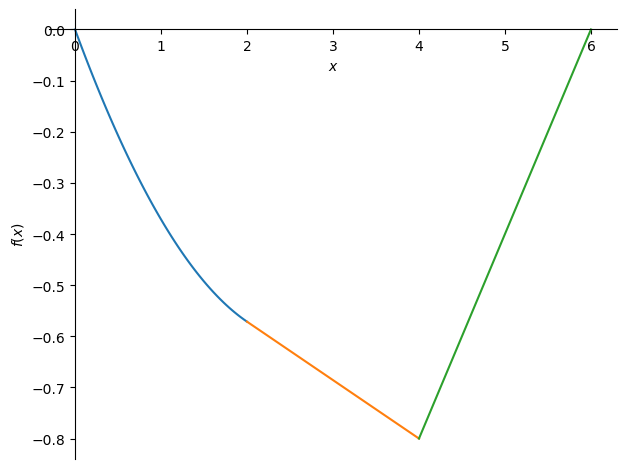

In [10]:
z1_sol = z1.subs(H,H_sol)
z2_sol = z2.subs(H,H_sol)
z3_sol = z3.subs(H,H_sol)
sp.plot((-z1_sol,(x,0,a)),(-z2_sol,(x,a,a+b)),(-z3_sol,(x,a+b,L)));

Alternative

In [11]:
%reset -f
import sympy as sp

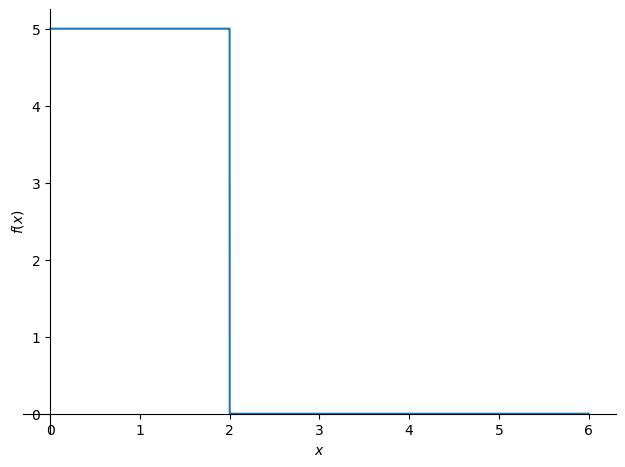

In [12]:
L = sp.Integer(6)
a = sp.Integer(2)
b = sp.Integer(2)
c = L - a - b
F = sp.Integer(15)
q0 = sp.Integer(5)

H, x= sp.symbols('H x')
C1, C2 = sp.symbols('C1 C2')
z = sp.symbols('z',cls=sp.Function)

q = q0*(sp.Integer(1)-sp.Heaviside(x-a))+F*sp.DiracDelta(x-(a+b))
sp.plot(q,(x,0,L))

In [13]:
V = sp.integrate(-q,x, meijerg=False)+C1
z = sp.integrate(V/H,x,  meijerg=False)+C2

display(V)
display(z)

eq1 = sp.Eq(z.subs(x,0),0)
eq2 = sp.Eq(z.subs(x,L),0)

sol = sp.solve([eq1,eq2,],[C1,C2])
z = z.subs(sol)

display(z)

C1 - 5*x + 5*(x - 2)*Heaviside(x - 2) - 15*Heaviside(x - 4)

C2 + (C1*x - 5*x**2/2 - 15*(x - 4)*Heaviside(x - 4) + 5*(x**2/2 - 2*x + 2)*Heaviside(x - 2))/H

(-5*x**2/2 + 40*x/3 - 15*(x - 4)*Heaviside(x - 4) + 5*(x**2/2 - 2*x + 2)*Heaviside(x - 2))/H

In [14]:
eq3 = sp.Eq(z.subs(x,a+b),4/5)
H_sol = sp.solve(eq3,H)[0]
H_sol = sp.nsimplify(H_sol)
display(H_sol)

175/6

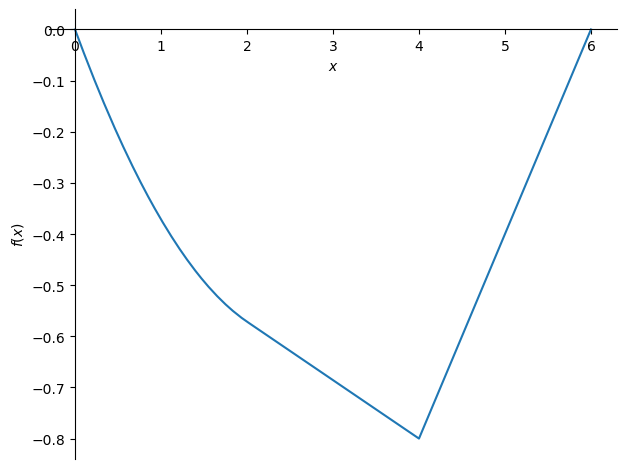

In [15]:
z_sol = z.subs(H,H_sol)
sp.plot(-z_sol,(x,0,L))

In [16]:
z_piecewise = z_sol.rewrite(sp.Piecewise) #direct gives wrong result, seems to do with https://github.com/sympy/sympy/issues/24274
LL = sp.integrate(sp.sqrt(1+sp.diff(z_piecewise,x)**2),(x,0,6))
display(LL)
display(LL.evalf())

-35*asinh(4/35)/12 + 35*asinh(16/35)/12 + 4*sqrt(1481)/105 + sqrt(1241)/21 + 2*sqrt(29)/5

6.25580223961325